In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.shape

(54808, 14)

In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [7]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [8]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())

In [9]:
df['previous_year_rating'] = df['previous_year_rating'].astype(int)

In [10]:
df = df.drop(['region','employee_id','age','recruitment_channel'], axis=1)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [12]:
df = pd.get_dummies(df, columns=['department', 'education'])

In [13]:
df.head()

,gender,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above
0,0,1,5,8,1,0,49,0,False,False,False,False,False,False,False,True,False,False,False,True
1,1,1,5,4,0,0,60,0,False,False,False,False,True,False,False,False,False,True,False,False
2,1,1,3,7,0,0,50,0,False,False,False,False,False,False,False,True,False,True,False,False
3,1,2,1,10,0,0,50,0,False,False,False,False,False,False,False,True,False,True,False,False
4,1,1,3,2,0,0,73,0,False,False,False,False,False,False,False,False,True,True,False,False


**Model Building**

In [14]:
!pip install lightgbm

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [15]:
X = df.drop('is_promoted', axis=1)
y = df['is_promoted']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lgb_estimator = lgb.LGBMClassifier()

In [18]:
# Here, we manually write random parameters that may be suitable.
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50],
    'feature_fraction': [0.8, 1.0]
}

In [19]:
# GridSearchCV chooses to build the best model within the parameter range I typed.
grid_search = GridSearchCV(estimator=lgb_estimator, param_grid=param, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Number of positive: 3760, number of negative: 40086
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 43846, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085755 -> initscore=-2.366608
[LightGBM] [Info] Start training from score -2.366608


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'feature_fraction': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [10, 15, -1],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [20, 31, 50]},
             scoring='accuracy', verbose=1)

In [28]:
# Here, we write the best parameters and equate them with final_model.
final_model = LGBMClassifier(
    feature_fraction=1.0,
    learning_rate=0.05,
    max_depth=15,
    n_estimators=200,
    num_leaves=20)

In [29]:
# This code trains a LightGBM model (final_model) on the training set (X_train, y_train).
final_model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Number of positive: 3760, number of negative: 40086
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 43846, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085755 -> initscore=-2.366608
[LightGBM] [Info] Start training from score -2.366608


LGBMClassifier(feature_fraction=1.0, learning_rate=0.05, max_depth=15,
               n_estimators=200, num_leaves=20)

In [30]:
# Here, we make predictions from the features in the test set (X_test) using the trained model (final_model).
y_pred = final_model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0


**Model Evaluation**

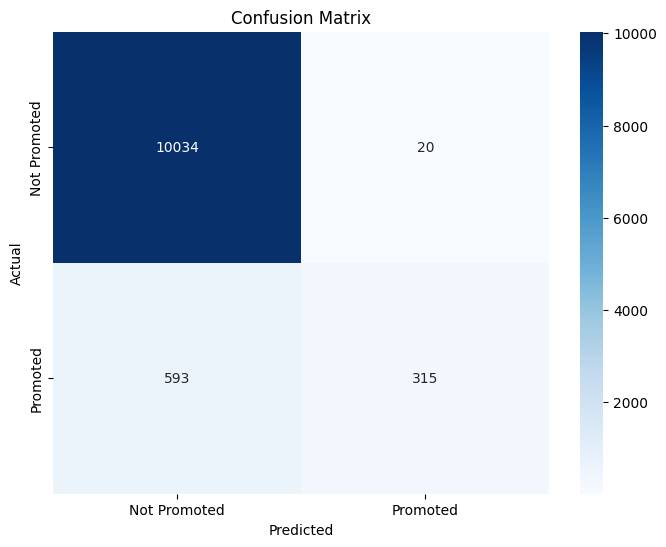

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Key Observations:
- High True Negatives: The model performs very well at predicting "Not Promoted" cases, as seen from the large value of 10,034.
- Class Imbalance: There are significantly fewer "Promoted" cases compared to "Not Promoted." This can lead to the model being biased towards predicting the majority class (Not Promoted).
- False Negatives Issue: 593 "Promoted" cases were missed, which could impact the business decision if correctly identifying promotions is critical.

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.94      0.35      0.51       908

    accuracy                           0.94     10962
   macro avg       0.94      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962

Model Accuracy: 0.94
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0


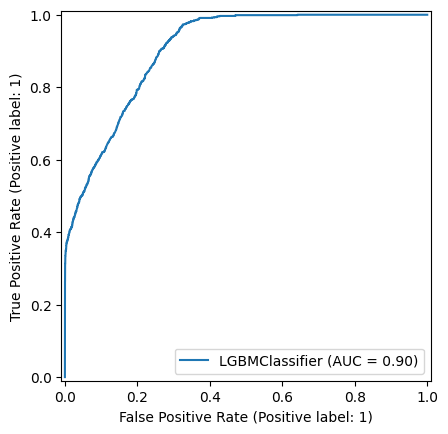

In [32]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# ROC Curve
RocCurveDisplay.from_estimator(final_model, X_test, y_test)
plt.show()

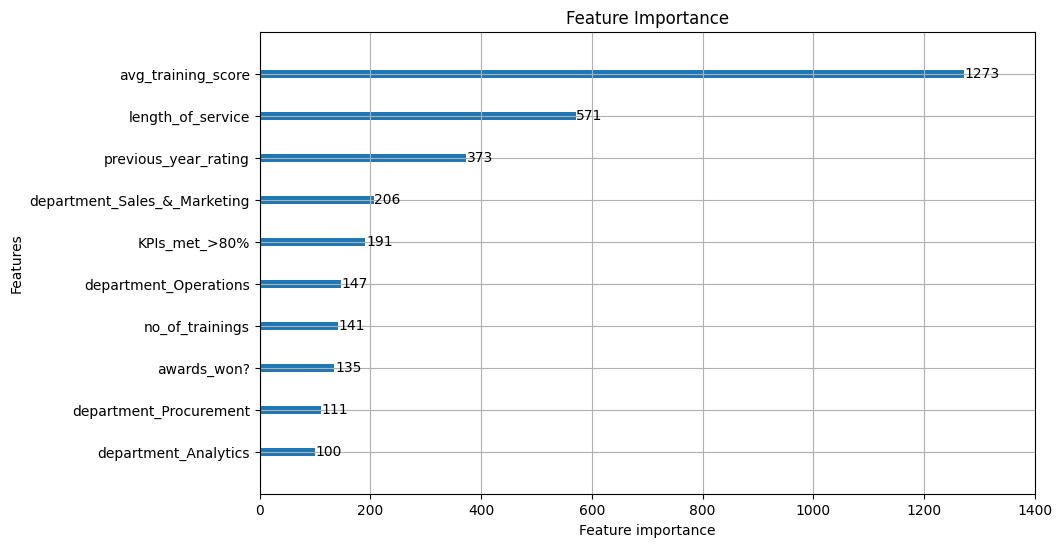

In [33]:
# Visually showing the importance of features in our model
import lightgbm as lgb

lgb.plot_importance(final_model, max_num_features=10, importance_type='split', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

In [34]:
# Final predictions
y_final_pred = final_model.predict(X_test)

# Save the final results as a Data Frame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_final_pred})
print(results.head())

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
       Actual  Predicted
40907       0          0
51939       0          0
6978        0          0
12814       0          0
22921       0          0


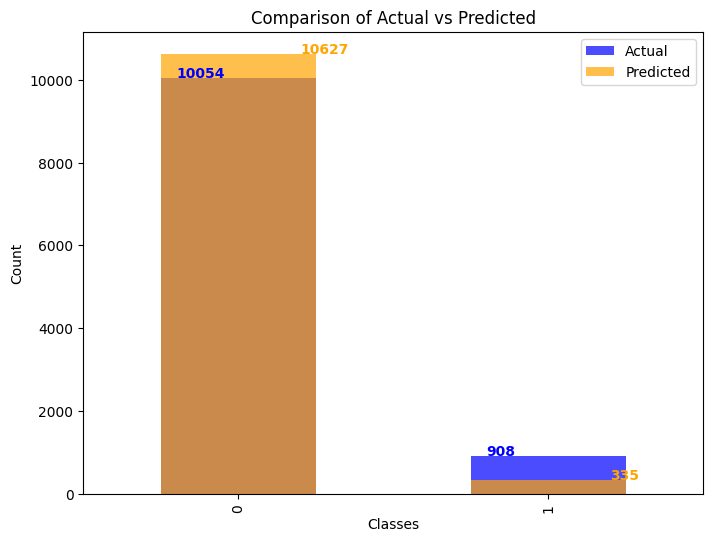

In [35]:
# Bar Chart for Actual vs Predicted with Values on Bars
actual_counts = results['Actual'].value_counts()
predicted_counts = results['Predicted'].value_counts()

# Bar plot
ax = actual_counts.plot(kind='bar', color='blue', label='Actual', alpha=0.7, figsize=(8, 6))
predicted_counts.plot(kind='bar', color='orange', label='Predicted', alpha=0.7, ax=ax)

# Adding values on top of bars
for i, v in enumerate(actual_counts):
    ax.text(i - 0.2, v + 10, str(v), color='blue', fontweight='bold')

for i, v in enumerate(predicted_counts):
    ax.text(i + 0.2, v + 10, str(v), color='orange', fontweight='bold')

# Chart settings
plt.title('Comparison of Actual vs Predicted')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.legend()
plt.show()